<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/ANNdeeplearning_breastcancerdataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
'''

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df  = pd.read_csv('/content/drive/My Drive/deeplearning/breastcancer.csv')

In [3]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  texture_worst  perimeter_worst  

**Dataset Summary**
569 rows × 33 columns

diagnosis: Target variable — "M" (Malignant) or "B" (Benign)

Unnamed: 32: Empty column — will be dropped

id: Just an identifier — also dropped

30 numerical features related to tumor characteristics

In [ ]:
'''
Let's Build a Neural Network Model (as per your assignment)
Step-by-Step Plan:
Drop irrelevant columns

Encode the target (M = 1, B = 0)

Normalize features

Split into train/test

Build & train a Keras model

Evaluate with accuracy, confusion matrix, AUC
'''

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4307 - loss: 0.7624 - val_accuracy: 0.8478 - val_loss: 0.5117
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9027 - loss: 0.4590 - val_accuracy: 0.9130 - val_loss: 0.3350
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9513 - loss: 0.2794 - val_accuracy: 0.9130 - val_loss: 0.2142
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9543 - loss: 0.1800 - val_accuracy: 0.9130 - val_loss: 0.1587
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9658 - loss: 0.1318 - val_accuracy: 0.9565 - val_loss: 0.1297
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9793 - loss: 0.1040 - val_accuracy: 0.9565 - val_loss: 0.1134
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9733 - loss: 0.0918 - val_accuracy: 0.9783 - val_loss: 0.1026
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9798 - loss: 0.0933 - val_accuracy: 0.9783 - val_loss: 0.0948
Ep

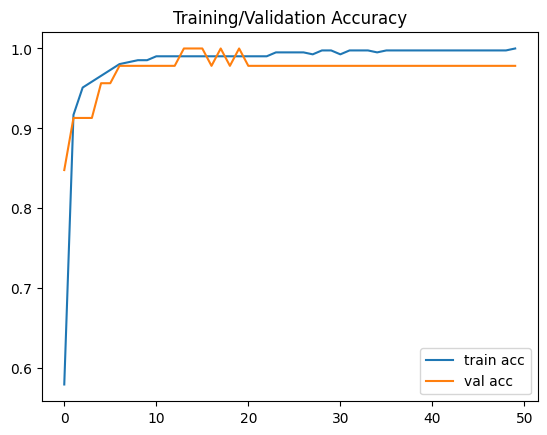

In [5]:
# STEP 1: Install TensorFlow (only if needed)
# !pip install tensorflow scikit-learn pandas matplotlib seaborn

# STEP 2: Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# STEP 3: Load and Prepare Data

df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns='diagnosis')
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 4: Build the Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STEP 5: Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# STEP 6: Evaluate
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_probs))

# STEP 7: Plot Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training/Validation Accuracy')
plt.show()


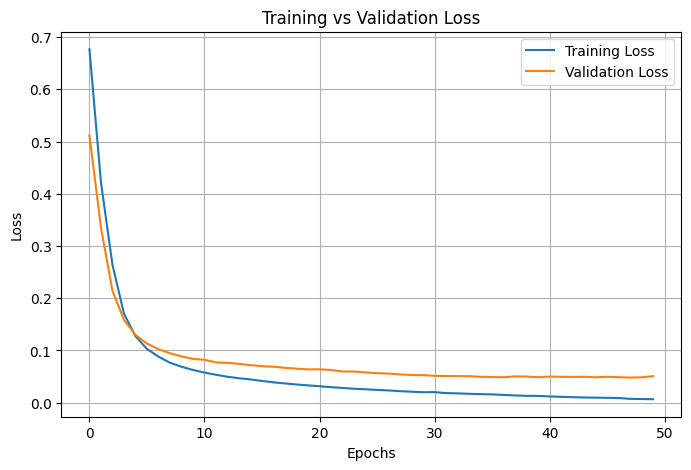

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
y_pred_probs = model.predict(X_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [8]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability': y_pred_probs
})

# Show first 10 predictions
print(results.head(10))

   Actual  Predicted  Probability
0       0          0     0.029927
1       1          1     1.000000
2       1          1     0.999990
3       0          0     0.000013
4       0          0     0.000001
5       1          1     1.000000
6       1          1     1.000000
7       1          1     0.983568
8       0          0     0.250314
9       0          0     0.000003


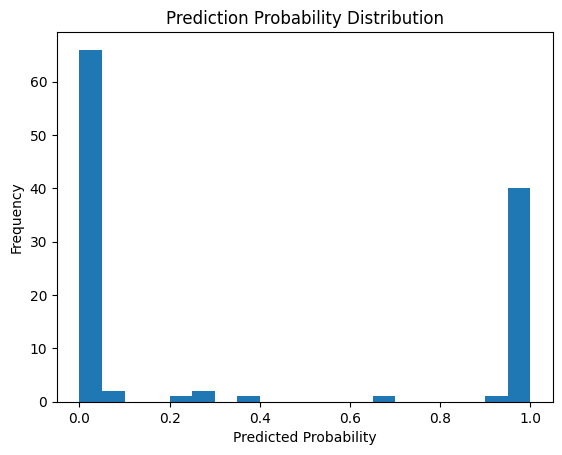

In [9]:
plt.hist(y_pred_probs, bins=20)
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()